<a href="https://colab.research.google.com/github/MangalaPriyadharshini/MangalaPriyadharshini/blob/main/MLAssignmentWeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
#Importing pandas
import pandas as pd

In [187]:
#Load Dataset
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [189]:
#printing dataset
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [190]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [162]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [191]:
#To decrease the column size of weather
def group_weather(w):
    if "Clear" in w:
        return "Clear"
    elif "Cloudy" in w or "Fog" in w or "Haze" in w:
        return "Cloudy"
    elif "Rain" in w or "Drizzle" in w or "Thunderstorm" in w:
        return "Rain"
    elif "Snow" in w:
        return "Snow"
    else:
        return "Other"
dataset["Weather"] = dataset["Weather"].apply(group_weather)

In [164]:
dataset["Weather"].value_counts()

,count
Weather,
Cloudy,4252
Clear,3432
Rain,618
Snow,482


In [165]:
#Independant values
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [166]:
#Dependant values
dep=dataset[["Weather"]]

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [168]:
from sklearn import tree

In [169]:
clf = tree.DecisionTreeClassifier()

In [170]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [171]:
y_pred=clf.predict(X_test)

In [196]:

#Performing Confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)


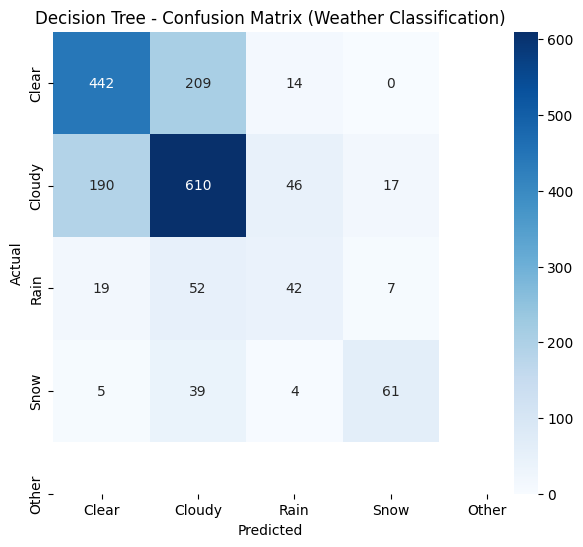

In [197]:
#Visualize
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Other']

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix (Weather Classification)')
plt.show()


In [176]:
from sklearn.metrics import classification_report

In [177]:
cls = classification_report(y_test, y_pred)

In [178]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.67      0.66      0.67       665
      Cloudy       0.67      0.71      0.69       863
        Rain       0.40      0.35      0.37       120
        Snow       0.72      0.56      0.63       109

    accuracy                           0.66      1757
   macro avg       0.61      0.57      0.59      1757
weighted avg       0.66      0.66      0.66      1757



In [179]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Cloudy
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Cloudy
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Cloudy
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Cloudy
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Cloudy
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [180]:
filename = "DecisionTreeClassifier.sav"

In [181]:
import pickle


In [182]:

#To perform accuracy
pickle.dump(clf,open(filename,'wb'))

In [183]:

clf=pickle.load(open("/content/DecisionTreeClassifier.sav",'rb'))

In [ ]:
result = clf.predict([[
   -1.8,-3.9,86,4,8,101.24
]])


In [185]:
#printing result
result

array(['Cloudy'], dtype=object)